# Colab E-iv: TensorFlow High-Level API (Sequential) - 3-Layer Deep Neural Network

## Overview
- **TensorFlow/Keras `Sequential` API** - highest level of abstraction
- Uses `model.compile()`, `model.fit()`, `model.evaluate()`, `model.predict()`
- Built-in callbacks, metrics, and TensorBoard logging
- Same 3-variable non-linear regression problem

### Target Non-Linear Equation
$$y = \sin(x_1) \cdot x_2^2 + \cos(x_3) \cdot x_1 + x_2 \cdot x_3^2$$

### Network Architecture
```
Sequential([
    Dense(64, 'relu'),
    Dense(32, 'relu'),
    Dense(16, 'relu'),
    Dense(1)
])
```

In [1]:
# ============================================================
# Section 1: Imports
# ============================================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow: {tf.__version__}")
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow: 2.19.0


In [2]:
# ============================================================
# Section 2: Generate & Prepare Data
# ============================================================
N_SAMPLES = 1000

x1 = np.random.uniform(-2, 2, (N_SAMPLES, 1)).astype(np.float32)
x2 = np.random.uniform(-2, 2, (N_SAMPLES, 1)).astype(np.float32)
x3 = np.random.uniform(-2, 2, (N_SAMPLES, 1)).astype(np.float32)

y = (np.sin(x1) * x2**2 + np.cos(x3) * x1 + x2 * x3**2).astype(np.float32)
X = np.hstack([x1, x2, x3])

# Normalize
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
y_mean, y_std = y.mean(), y.std()
X_norm = ((X - X_mean) / X_std).astype(np.float32)
y_norm = ((y - y_mean) / y_std).astype(np.float32)

# Use sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y_norm, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Equation: y = sin(x1)*x2² + cos(x3)*x1 + x2*x3²")

Train: (800, 3), Test: (200, 3)
Equation: y = sin(x1)*x2² + cos(x3)*x1 + x2*x3²


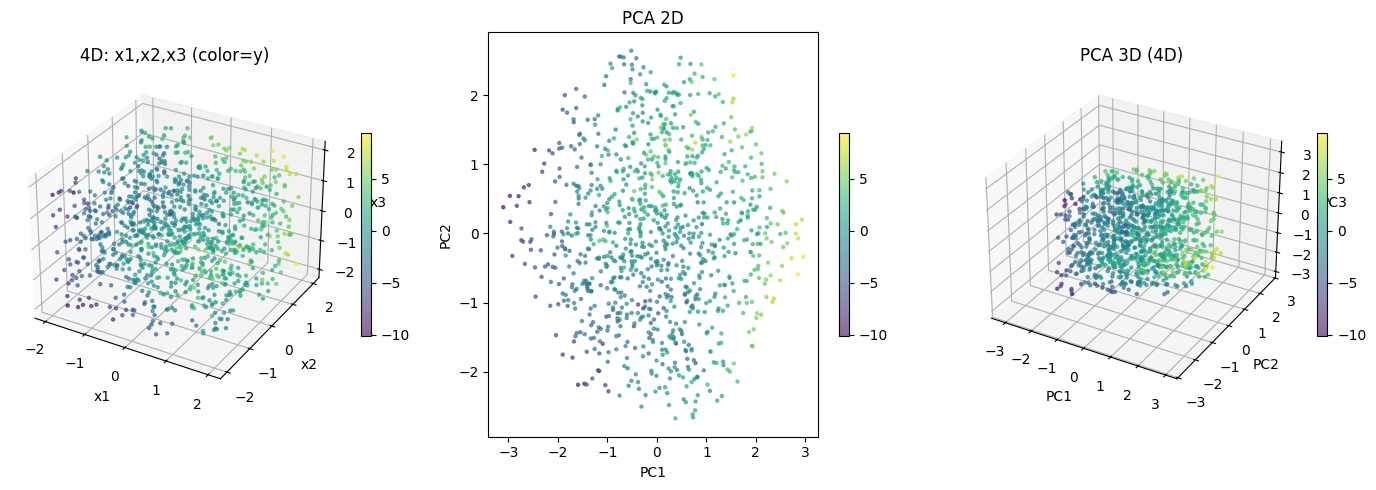

In [3]:
# ============================================================
# Section 3: 4D Data Visualization
# ============================================================
fig = plt.figure(figsize=(14, 5))

# 4D: 3 spatial + color
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.flatten(), cmap='viridis', s=5, alpha=0.6)
ax1.set_xlabel('x1'); ax1.set_ylabel('x2'); ax1.set_zlabel('x3')
ax1.set_title('4D: x1,x2,x3 (color=y)')
plt.colorbar(sc1, ax=ax1, shrink=0.5)

# PCA 2D
pca2 = PCA(n_components=2); Xp2 = pca2.fit_transform(X)
ax2 = fig.add_subplot(132)
sc2 = ax2.scatter(Xp2[:, 0], Xp2[:, 1], c=y.flatten(), cmap='viridis', s=5, alpha=0.6)
ax2.set_xlabel('PC1'); ax2.set_ylabel('PC2'); ax2.set_title('PCA 2D')
plt.colorbar(sc2, ax=ax2, shrink=0.5)

# PCA 3D
pca3 = PCA(n_components=3); Xp3 = pca3.fit_transform(X)
ax3 = fig.add_subplot(133, projection='3d')
sc3 = ax3.scatter(Xp3[:, 0], Xp3[:, 1], Xp3[:, 2], c=y.flatten(), cmap='viridis', s=5, alpha=0.6)
ax3.set_xlabel('PC1'); ax3.set_ylabel('PC2'); ax3.set_zlabel('PC3')
ax3.set_title('PCA 3D (4D)')
plt.colorbar(sc3, ax=ax3, shrink=0.5)

plt.tight_layout()
plt.show()

In [4]:
# ============================================================
# Section 4: Build Sequential Model (High-Level API)
# ============================================================
# This is the simplest, highest-level way to build a model in Keras

model = Sequential([
    layers.Input(shape=(3,), name='input'),

    # Hidden Layer 1: 64 neurons, ReLU, He initialization
    layers.Dense(64, activation='relu', kernel_initializer='he_normal',
                 name='hidden_1'),
    layers.BatchNormalization(name='bn_1'),

    # Hidden Layer 2: 32 neurons, ReLU
    layers.Dense(32, activation='relu', kernel_initializer='he_normal',
                 name='hidden_2'),
    layers.BatchNormalization(name='bn_2'),

    # Hidden Layer 3: 16 neurons, ReLU
    layers.Dense(16, activation='relu', kernel_initializer='he_normal',
                 name='hidden_3'),
    layers.BatchNormalization(name='bn_3'),

    # Output Layer: 1 neuron, Linear
    layers.Dense(1, name='output')
], name='ThreeLayerDNN_Sequential')

model.summary()

Model: "ThreeLayerDNN_Sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3 (BatchNormalization)       │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,105 (12.13 KB)

 Non-trainable params: 224 (896.00 B)

In [5]:
# ============================================================
# Section 5: Compile Model
# ============================================================

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

print("Model compiled with:")
print("  Optimizer: Adam (lr=0.001)")
print("  Loss: MSE")
print("  Metrics: MAE, MSE")

Model compiled with:
  Optimizer: Adam (lr=0.001)
  Loss: MSE
  Metrics: MAE, MSE


In [6]:
# ============================================================
# Section 6: Define Callbacks
# ============================================================

callbacks = [
    # Stop early if validation loss doesn't improve
    EarlyStopping(
        monitor='val_loss',
        patience=100,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate when loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=30,
        min_lr=1e-6,
        verbose=1
    ),

    # Save best model
    ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )
]

print("Callbacks configured:")
print("  - EarlyStopping (patience=100)")
print("  - ReduceLROnPlateau (factor=0.5, patience=30)")
print("  - ModelCheckpoint (save best)")

Callbacks configured:
  - EarlyStopping (patience=100)
  - ReduceLROnPlateau (factor=0.5, patience=30)
  - ModelCheckpoint (save best)


In [7]:
# ============================================================
# Section 7: Train Model with model.fit()
# ============================================================

print("Training with model.fit() - highest level API...")
print("=" * 60)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

print("\nTraining complete!")
print(f"Epochs trained: {len(history.history['loss'])}")

Training with model.fit() - highest level API...
Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - loss: 1.9224 - mae: 1.0217 - mse: 1.9224 - val_loss: 3.3982 - val_mae: 1.4770 - val_mse: 3.3982 - learning_rate: 0.0010
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5006 - mae: 0.5329 - mse: 0.5006 - val_loss: 1.9745 - val_mae: 1.0901 - val_mse: 1.9745 - learning_rate: 0.0010
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2617 - mae: 0.3966 - mse: 0.2617 - val_loss: 1.4162 - val_mae: 0.9120 - val_mse: 1.4162 - learning_rate: 0.0010
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1890 - mae: 0.3447 - mse: 0.1890 - val_loss: 1.0374 - val_mae: 0.7698 - val_mse: 1.0374 - learning_rate: 0.0010
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1548 - mae: 0.3102 - mse: 0.1548 - val_loss: 0.7812 - val_mae: 0.6522 - val_mse: 0.7812 - learning_rate: 0.0010
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1363 - mae: 0.2913

In [8]:
# ============================================================
# Section 8: Evaluate Model
# ============================================================

# Built-in evaluation
print("Model Evaluation (Test Set):")
results = model.evaluate(X_test, y_test, verbose=0)
metric_names = model.metrics_names
for name, val in zip(metric_names, results):
    print(f"  {name}: {val:.6f}")

Model Evaluation (Test Set):
  loss: 0.016932
  compile_metrics: 0.098747


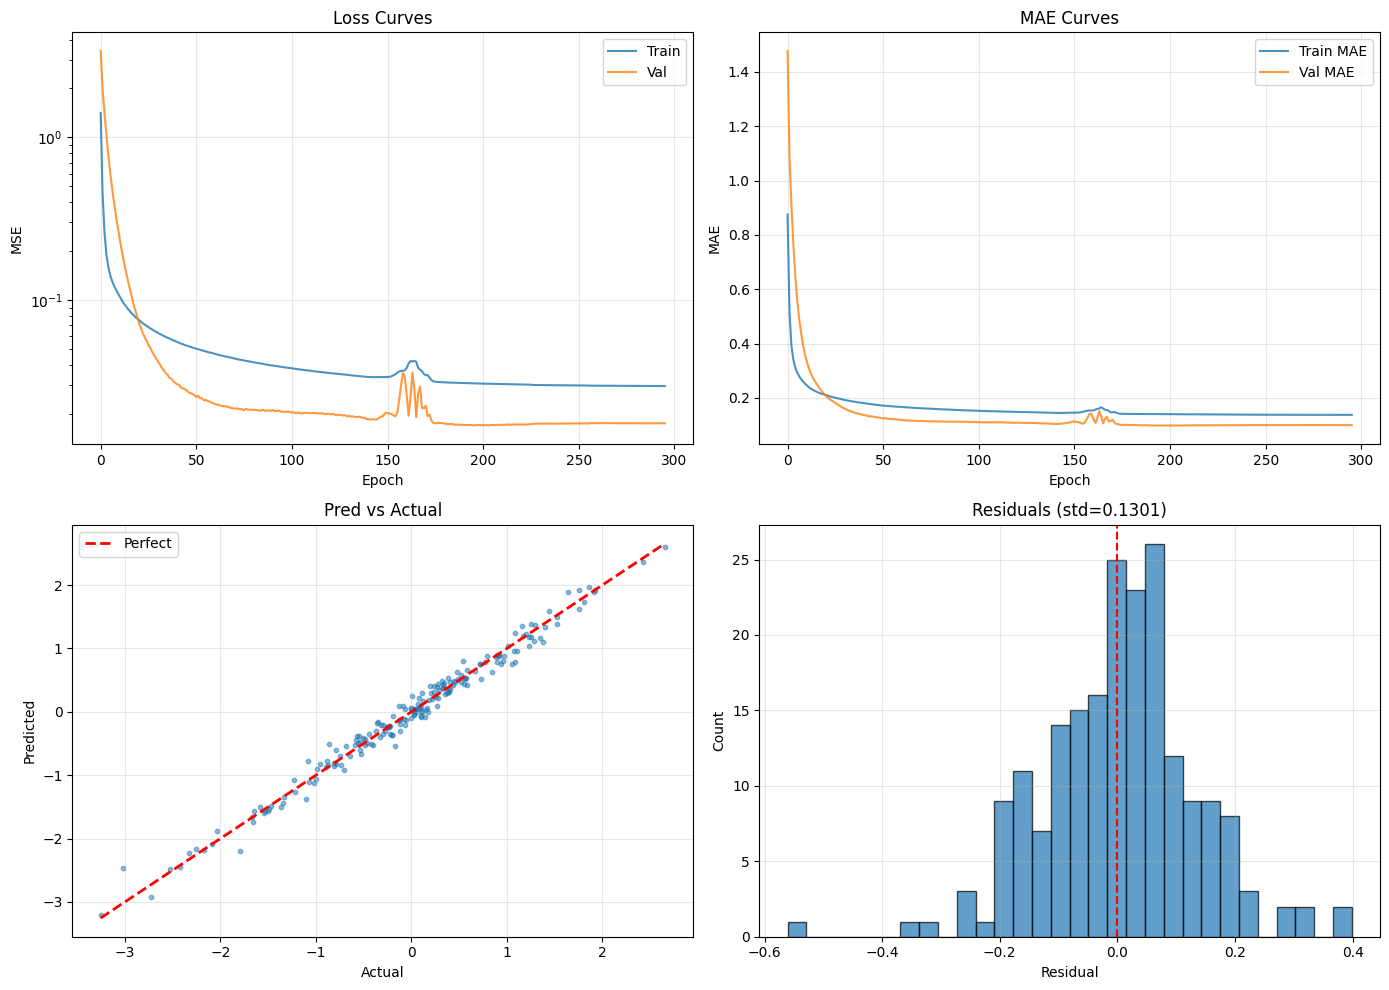

R²: 0.983400
MAE: 0.098747
RMSE: 0.130124


In [9]:
# ============================================================
# Section 9: Results Visualization
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loss curves
axes[0, 0].plot(history.history['loss'], label='Train', alpha=0.8)
axes[0, 0].plot(history.history['val_loss'], label='Val', alpha=0.8)
axes[0, 0].set_xlabel('Epoch'); axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('Loss Curves'); axes[0, 0].legend()
axes[0, 0].set_yscale('log'); axes[0, 0].grid(True, alpha=0.3)

# MAE curves
axes[0, 1].plot(history.history['mae'], label='Train MAE', alpha=0.8)
axes[0, 1].plot(history.history['val_mae'], label='Val MAE', alpha=0.8)
axes[0, 1].set_xlabel('Epoch'); axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('MAE Curves'); axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Predictions vs Actual
y_final = model.predict(X_test, verbose=0)

axes[1, 0].scatter(y_test, y_final, alpha=0.5, s=10)
mn, mx = min(y_test.min(), y_final.min()), max(y_test.max(), y_final.max())
axes[1, 0].plot([mn, mx], [mn, mx], 'r--', lw=2, label='Perfect')
axes[1, 0].set_xlabel('Actual'); axes[1, 0].set_ylabel('Predicted')
axes[1, 0].set_title('Pred vs Actual'); axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Residuals
res = (y_test - y_final).flatten()
axes[1, 1].hist(res, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Residual'); axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title(f'Residuals (std={res.std():.4f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

r2 = 1 - np.sum(res**2) / np.sum((y_test.flatten() - y_test.mean())**2)
print(f"R²: {r2:.6f}")
print(f"MAE: {np.mean(np.abs(res)):.6f}")
print(f"RMSE: {np.sqrt(np.mean(res**2)):.6f}")

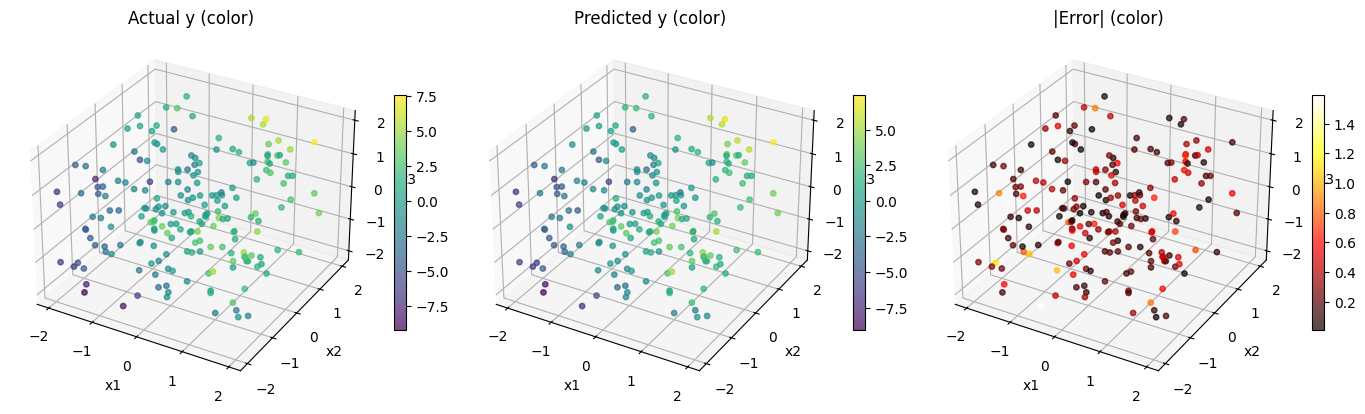

In [10]:
# ============================================================
# Section 10: 4D Prediction Visualization
# ============================================================
fig = plt.figure(figsize=(14, 5))

X_test_orig = X_test * X_std + X_mean
y_test_orig = y_test * y_std + y_mean
y_pred_orig = y_final * y_std + y_mean

# Actual
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(X_test_orig[:, 0], X_test_orig[:, 1], X_test_orig[:, 2],
                   c=y_test_orig.flatten(), cmap='viridis', s=15, alpha=0.7)
ax1.set_xlabel('x1'); ax1.set_ylabel('x2'); ax1.set_zlabel('x3')
ax1.set_title('Actual y (color)')
plt.colorbar(sc1, ax=ax1, shrink=0.5)

# Predicted
ax2 = fig.add_subplot(132, projection='3d')
sc2 = ax2.scatter(X_test_orig[:, 0], X_test_orig[:, 1], X_test_orig[:, 2],
                   c=y_pred_orig.flatten(), cmap='viridis', s=15, alpha=0.7)
ax2.set_xlabel('x1'); ax2.set_ylabel('x2'); ax2.set_zlabel('x3')
ax2.set_title('Predicted y (color)')
plt.colorbar(sc2, ax=ax2, shrink=0.5)

# Error
errors = np.abs(y_test_orig - y_pred_orig).flatten()
ax3 = fig.add_subplot(133, projection='3d')
sc3 = ax3.scatter(X_test_orig[:, 0], X_test_orig[:, 1], X_test_orig[:, 2],
                   c=errors, cmap='hot', s=15, alpha=0.7)
ax3.set_xlabel('x1'); ax3.set_ylabel('x2'); ax3.set_zlabel('x3')
ax3.set_title('|Error| (color)')
plt.colorbar(sc3, ax=ax3, shrink=0.5)

plt.tight_layout()
plt.show()

In [11]:
# ============================================================
# Section 11: Sample Predictions & Summary
# ============================================================

print("Sample Predictions (Original Scale):")
print("=" * 70)
print(f"{'Idx':>5} | {'x1':>7} | {'x2':>7} | {'x3':>7} | {'Actual':>9} | {'Pred':>9} | {'Err':>7}")
print("-" * 70)
for i in range(15):
    a, p = y_test_orig[i, 0], y_pred_orig[i, 0]
    print(f"{i:5d} | {X_test_orig[i,0]:7.3f} | {X_test_orig[i,1]:7.3f} | {X_test_orig[i,2]:7.3f} | {a:9.4f} | {p:9.4f} | {abs(a-p):7.4f}")

print(f"\nRMSE: {np.sqrt(np.mean((y_test_orig - y_pred_orig)**2)):.4f}")
print(f"R²: {r2:.6f}")

print("\n=== Colab E-iv Complete ===")
print("Key: TensorFlow High-Level Sequential API")
print("- keras.Sequential for model construction")
print("- model.compile() / model.fit() / model.evaluate() / model.predict()")
print("- BatchNormalization for training stability")
print("- Multiple callbacks: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint")
print("- Built-in history tracking and metric logging")
print("- Simplest and most concise API")

Sample Predictions (Original Scale):
  Idx |      x1 |      x2 |      x3 |    Actual |      Pred |     Err
----------------------------------------------------------------------
    0 |  -0.476 |   1.738 |  -1.462 |    2.2791 |    2.5260 |  0.2469
    1 |   1.266 |  -1.222 |   0.178 |    2.6312 |    2.5760 |  0.0552
    2 |  -0.149 |   1.310 |  -0.537 |   -0.0053 |    0.2073 |  0.2126
    3 |  -0.576 |   0.402 |  -0.111 |   -0.6553 |   -0.6455 |  0.0098
    4 |   1.800 |  -1.552 |  -1.438 |   -0.6237 |   -0.6311 |  0.0074
    5 |   1.878 |  -1.306 |  -1.554 |   -1.4962 |   -1.3390 |  0.1572
    6 |  -0.150 |  -1.196 |  -1.643 |   -3.4315 |   -3.5793 |  0.1478
    7 |   1.464 |  -1.927 |   0.042 |    5.1522 |    4.9507 |  0.2015
    8 |  -1.737 |   0.914 |  -1.299 |    0.2525 |    0.1959 |  0.0566
    9 |   0.075 |   1.405 |  -1.682 |    4.1160 |    4.5414 |  0.4254
   10 |   1.356 |   1.057 |   0.562 |    2.5738 |    2.2547 |  0.3191
   11 |   1.085 |  -0.463 |  -1.045 |    0.2290 |   